In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### *Brought in the data from SuperheroAPI*

In [3]:
superhero_df = pd.read_csv('../data/superheroes.csv')
superhero_df

,Unnamed: 0,response,id,name,powerstats.intelligence,powerstats.strength,powerstats.speed,powerstats.durability,powerstats.power,powerstats.combat,...,appearance.race,appearance.height,appearance.weight,appearance.eye-color,appearance.hair-color,work.occupation,work.base,connections.group-affiliation,connections.relatives,image.url
0,0,success,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,1,success,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
2,2,success,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
3,3,success,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,4,success,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,success,727,Yellowjacket II,50.0,10.0,35.0,28.0,31.0,28.0,...,Human,"[""5'5"", '165 cm']","['115 lb', '52 kg']",Blue,Strawberry Blond,"Adventurer; former criminal, electronics engineer",New York City area,"Formerly Guardians of the Galaxy, Avengers, Ma...",-,https://www.superherodb.com/pictures2/portrait...
727,727,success,728,Ymir,50.0,100.0,27.0,100.0,98.0,28.0,...,Frost Giant,"['1000', '304.8 meters']","['- lb', '0 kg']",White,No Hair,-,Niffleheim,-,"Utgard-Loki, Loki, and the race of Frost Giant...",https://www.superherodb.com/pictures2/portrait...
728,728,success,729,Yoda,88.0,52.0,33.0,25.0,100.0,90.0,...,Yoda's species,"[""2'2"", '66 cm']","['38 lb', '17 kg']",Brown,White,-,-,"Jedi Order, Jedi High Counsl, Galactic Republic","Master: N'Kata Del Gormo, Apprentices: Dooku, ...",https://www.superherodb.com/pictures2/portrait...
729,729,success,730,Zatanna,81.0,10.0,23.0,28.0,100.0,56.0,...,Human,"[""5'7"", '170 cm']","['127 lb', '57 kg']",Blue,Black,-,-,"Misty Kilgore, Seven Soldiers of Victory, Just...","Giovanni ""John"" Zatara (father, deceased), Sin...",https://www.superherodb.com/pictures2/portrait...


### *Renamed columns to clean up dataframe*

In [5]:
superhero_df.rename(columns={'powerstats.intelligence':'intelligence', 'powerstats.strength': 'strength', 'powerstats.speed': 'speed', 'powerstats.durability': 'durability','powerstats.power': 'power', 'powerstats.combat': 'combat', 
                             'biography.full-name': 'full_name', 'biography.alter-egos':'alter_egos', 'biography.aliases' : 'aliases', 'biography.place-of-birth': 'place_of_birth', 'biography.first-appearance' : 'first_appearance', 'biography.publisher': 'publisher', 
                             'biography.alignment': 'alignment', 'appearance.gender' : 'gender','appearance.race' : 'race', 'appearance.height' : 'height', 'appearance.weight' : 'weight', 'appearance.eye-color' : 'eye_color',
                            'appearance.hair-color' : 'hair_color', 'work.occupation' : 'occupation', 'work.base': 'city_base','connections.group-affiliation' : 'group_affiliation', 'connections.relatives': 'relatives', 'image.url': 'image_url'}, inplace=True)
superhero_df.head(1)

,Unnamed: 0,response,id,name,intelligence,strength,speed,durability,power,combat,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,0,success,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...


### *Removed columns that aren't needed for analysis*

In [7]:
superhero_df = superhero_df.drop(columns=['Unnamed: 0', 'response'])
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...


### *EDA of Dataset, removed/replaced Null values*

In [9]:
superhero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full_name          630 non-null    object 
 9   alter_egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place_of_birth     731 non-null    object 
 12  first_appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race               429 non

In [10]:
superhero_df.isnull().sum()

id                     0
name                   0
intelligence         165
strength             102
speed                165
durability           165
power                165
combat               165
full_name            101
alter_egos             0
aliases                0
place_of_birth         0
first_appearance       0
publisher             15
alignment              0
gender                 0
race                 302
height                 0
weight                 0
eye_color              0
hair_color             0
occupation             0
city_base              0
group_affiliation      0
relatives              0
image_url              0
dtype: int64

In [11]:
superhero_df['full_name'] = superhero_df['full_name'].fillna('NO DATA')
superhero_df['publisher'] = superhero_df['publisher'].fillna('NO DATA')
superhero_df['race'] = superhero_df['race'].fillna('NO DATA')
superhero_df['intelligence'] = superhero_df['intelligence'].fillna('0')
superhero_df['strength'] = superhero_df['strength'].fillna('0')
superhero_df['speed'] = superhero_df['speed'].fillna('0')
superhero_df['durability'] = superhero_df['durability'].fillna('0')
superhero_df['power'] = superhero_df['power'].fillna('0')
superhero_df['combat'] = superhero_df['combat'].fillna('0')
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...


### *Transformed stats into interger to drop zeros* 

In [13]:
superhero_df['intelligence'] = superhero_df['intelligence'].astype(int)
superhero_df['strength'] = superhero_df['strength'].astype(int)
superhero_df['speed'] = superhero_df['speed'].astype(int)
superhero_df['durability'] = superhero_df['durability'].astype(int)
superhero_df['power'] = superhero_df['power'].astype(int)
superhero_df['combat'] = superhero_df['combat'].astype(int)
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-Bomb,38,100,17,80,24,64,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...


### *Set most columns to uppercase for consistant formatting...*

In [15]:
superhero_df['name'] = superhero_df['name'].str.upper()
superhero_df['full_name'] = superhero_df['full_name'].str.upper()
superhero_df['alter_egos'] = superhero_df['alter_egos'].str.upper()
superhero_df['aliases'] = superhero_df['aliases'].str.upper()
superhero_df['place_of_birth'] = superhero_df['place_of_birth'].str.upper()
superhero_df['first_appearance'] = superhero_df['first_appearance'].str.upper()
superhero_df['publisher'] = superhero_df['publisher'].str.upper()
superhero_df['alignment'] = superhero_df['alignment'].str.upper()
superhero_df['gender'] = superhero_df['gender'].str.upper()
superhero_df['race'] = superhero_df['race'].str.upper()
superhero_df['hair_color'] = superhero_df['hair_color'].str.upper()
superhero_df['occupation'] = superhero_df['occupation'].str.upper()
superhero_df['city_base'] = superhero_df['city_base'].str.upper()
superhero_df['eye_color'] = superhero_df['eye_color'].str.upper()
superhero_df['weight'] = superhero_df['weight'].str.upper()
superhero_df['group_affiliation'] = superhero_df['group_affiliation'].str.upper()
superhero_df['relatives'] = superhero_df['relatives'].str.upper()
superhero_df['weight'] = superhero_df['weight'].str.replace('- lb', 'NO DATA')
superhero_df['height'] = superhero_df['height'].str.replace('-', 'NO DATA')
superhero_df['weight'] = superhero_df['weight'].str.replace('- LB', 'NO DATA')
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,HUMAN,"[""6'8"", '203 cm']","['980 LB', '441 KG']",YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",-,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...


### *Cleaned up height and weight columns*

In [17]:
superhero_df['height'] = superhero_df['height'].str.split(',').str[0]
superhero_df['height'] = superhero_df['height'].str.lstrip('[')
superhero_df['weight'] = superhero_df['weight'].str.split(',').str[0]
superhero_df['weight'] = superhero_df['weight'].str.lstrip('[')
superhero_df['height'] = superhero_df['height'].str.strip('"')
superhero_df['weight'] = superhero_df['weight'].str.strip("'")
superhero_df['height'] = superhero_df['height'].str.strip("'")
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,HUMAN,6'8,980 LB,YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",-,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...


###  *Brief sanity check*

In [19]:
superhero_df.isnull().sum()

id                   0
name                 0
intelligence         0
strength             0
speed                0
durability           0
power                0
combat               0
full_name            0
alter_egos           0
aliases              0
place_of_birth       0
first_appearance     0
publisher            0
alignment            0
gender               0
race                 0
height               0
weight               0
eye_color            0
hair_color           0
occupation           0
city_base            0
group_affiliation    0
relatives            0
image_url            0
dtype: int64

### *Updated 7 missing alignments to 'anti-heroes'*

In [21]:
superhero_df['alignment'].value_counts()

alignment
GOOD       494
BAD        206
NEUTRAL     24
-            7
Name: count, dtype: int64

In [22]:
superhero_df[superhero_df['alignment'] == '-']

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
33,34,ANTI-VENOM,75,60,65,90,96,84,EDDIE BROCK,"TOXIN, VENOM",...,SYMBIOTE,7'6,795 LB,BLUE,BLOND,VIGILANTE; FORMER JOURNALIST FOR THE DAILY GLOBE,"NEW YORK, NEW YORK",-,"CARL BROCK (FATHER, ESTRANGED), JANINE BROCK (...",https://www.superherodb.com/pictures2/portrait...
110,111,BLACKWULF,50,28,8,30,69,25,LUCIAN,NO ALTER EGOS FOUND.,...,ALIEN,6'2,195 LB,RED,WHITE,FREEDOM FIGHTER,-,UNDERGROUND LEGION,TANTALUS (FATHER); NIRVANA (MOTHER); PELOPS (B...,https://www.superherodb.com/pictures2/portrait...
138,139,BRUNDLEFLY,69,32,25,40,27,15,SETH BRUNDLE,NO ALTER EGOS FOUND.,...,MUTANT,6'4,NO DATA,-,-,SCIENTIST,-,-,-,https://www.superherodb.com/pictures2/portrait...
425,426,MAN OF MIRACLES,100,100,100,100,100,100,NO DATA,NO ALTER EGOS FOUND.,...,GOD / ETERNAL,NO DATA,NO DATA,BLUE,SILVER,-,-,-,-,https://www.superherodb.com/pictures2/portrait...
532,533,Q,100,12,17,100,100,40,Q,NO ALTER EGOS FOUND.,...,GOD / ETERNAL,NO DATA,NO DATA,-,-,-,-,-,-,https://www.superherodb.com/pictures2/portrait...
673,674,TRICKSTER,0,0,0,0,0,0,GIOVANNI GIUSEPPE,NO ALTER EGOS FOUND.,...,HUMAN,6'0,179 LB,BLUE,BLOND,"SPECIAL EFFECTS DESIGNER, CON ARTIST",KEYSTONE CITY,-,-,https://www.superherodb.com/pictures2/portrait...
689,690,VENOMPOOL,69,57,63,100,100,100,WADE WILSON,"DEADPOOL, EVIL DEADPOOL",...,SYMBIOTE,7'5,NO DATA,-,-,CONQUEROR; ADVENTURER,-,-,-,https://www.superherodb.com/pictures2/portrait...


In [23]:
superhero_df.loc[superhero_df['alignment'] == '-', 'alignment'] = 'ANTI-HERO'
superhero_df.loc[superhero_df['alignment'] == '-', 'alignment'] = 'ANTI-HERO'
superhero_df.head()

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,HUMAN,6'8,980 LB,YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",-,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...
1,2,ABE SAPIEN,88,28,35,65,100,85,ABRAHAM SAPIEN,NO ALTER EGOS FOUND.,...,ICTHYO SAPIEN,6'3,145 LB,BLUE,NO HAIR,PARANORMAL INVESTIGATOR,-,BUREAU FOR PARANORMAL RESEARCH AND DEFENSE,"EDITH HOWARD (WIFE, DECEASED)",https://www.superherodb.com/pictures2/portrait...
2,3,ABIN SUR,50,90,53,64,99,65,NO DATA,NO ALTER EGOS FOUND.,...,UNGARAN,6'1,200 LB,BLUE,NO HAIR,"GREEN LANTERN, FORMER HISTORY PROFESSOR",OA,"GREEN LANTERN CORPS, BLACK LANTERN CORPS","AMON SUR (SON), ARIN SUR (SISTER), THAAL SINES...",https://www.superherodb.com/pictures2/portrait...
3,4,ABOMINATION,63,80,53,90,62,95,EMIL BLONSKY,NO ALTER EGOS FOUND.,...,HUMAN / RADIATION,6'8,980 LB,GREEN,NO HAIR,EX-SPY,MOBILE,FORMER MEMBER OF THE CREW OF THE ANDROMEDA STA...,"NADIA DORNOVA BLONSKY (WIFE, SEPARATED)",https://www.superherodb.com/pictures2/portrait...
4,5,ABRAXAS,88,63,83,100,100,55,ABRAXAS,NO ALTER EGOS FOUND.,...,COSMIC ENTITY,NO DATA,NO DATA,BLUE,BLACK,DIMENSIONAL DESTROYER,-,COSMIC BEINGS,"ETERNITY (""FATHER"")",https://www.superherodb.com/pictures2/portrait...


### *Added NO DATA to fields that had no data*

In [25]:
superhero_df.loc[superhero_df['eye_color'] == '-', 'eye_color'] = 'NO DATA'
superhero_df.loc[superhero_df['full_name'] == '-', 'full_name'] = 'NO DATA'
superhero_df.loc[superhero_df['hair_color'] == '-', 'hair_color'] = 'NO DATA'
superhero_df.loc[superhero_df['city_base'] == '-', 'city_base'] = 'NO DATA'
superhero_df.loc[superhero_df['group_affiliation'] == '-', 'group_affiliation'] = 'NO DATA'
superhero_df.loc[superhero_df['relatives'] == '-', 'relatives'] = 'NO DATA'
superhero_df.loc[superhero_df['occupation'] == '-', 'occupation'] = 'NO DATA'
superhero_df.loc[superhero_df['weight'] == '- LB', 'weight'] = 'NO DATA'
superhero_df.loc[superhero_df['first_appearance'] == '-', 'first_appearance'] = 'NO DATA'
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,HUMAN,6'8,980 LB,YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",NO DATA,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...


### *Addressed missing genders: manually looked up the missing 30 genders*
*Identified the missing fields for gender, found the index number for the rows where gender was missing. Assigned the missing genders to the correct rows of the dataframe.* 

In [27]:
superhero_df['gender'].value_counts()

gender
MALE      502
FEMALE    200
-          29
Name: count, dtype: int64

In [28]:
superhero_df[superhero_df['gender'] == '-']

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,race,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url
87,88,BIRD-BRAIN,25,10,35,28,21,42,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,"NEW MUTANTS, ANI-MATE",NO DATA,https://www.superherodb.com/pictures2/portrait...
112,113,BLAQUESMITH,0,0,0,0,0,0,NO DATA,VERTIGO II,...,NO DATA,NO DATA,NO DATA,BLACK,NO HAIR,INVENTOR,"BALTIMORE, MARYLAND",CLAN ASKANI/CLAN CHOSEN,NO DATA,https://www.superherodb.com/pictures2/portrait...
133,134,BOX III,0,0,0,0,0,0,DR. WALTER LANGOWSKI,NO ALTER EGOS FOUND.,...,NO DATA,6'4,245 LB,BLUE,BLOND,"PHYSICS PROFESSOR, FORMER NFL PLAYER",BASE OF OPERATIONS UNKNOWN,ALPHA FLIGHT,NO KNOWN RELATIVES,https://www.superherodb.com/pictures2/portrait...
134,135,BOX IV,50,75,23,28,11,56,MADISON JEFFRIES,GEMINI V,...,NO DATA,NO DATA,NO DATA,BROWN,BROWN / BLACK,"INVENTOR, FORMER SOLDIER",BASE OF OPERATIONS UNKNOWN,"ALPHA FLIGHT, GAMMA FLIGHT, ZODIAC, TEAM_WEAPON_X","SCRAMBLE (LIONEL JEFFRIES, BROTHER, DECEASED),...",https://www.superherodb.com/pictures2/portrait...
160,161,CAPTAIN UNIVERSE,0,92,0,0,0,0,NO DATA,NO ALTER EGOS FOUND.,...,GOD / ETERNAL,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...
165,166,CECILIA REYES,0,0,0,0,0,0,DR. CECILIA REYES,NO ALTER EGOS FOUND.,...,NO DATA,5'7,138 LB,BROWN,BROWN,DOCTOR IN PRIVATE PRACTICE,SALEM CENTER,X-MEN,NO DATA,https://www.superherodb.com/pictures2/portrait...
178,179,CLEA,0,39,0,0,0,0,CLEA,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,WHITE,FORMER RULER AND SORCERESS SUPREME OF THE DARK...,BASE OF OPERATIONS UNKNOWN,NO DATA,"DORMAMMU (UNCLE), UMAR (MOTHER)",https://www.superherodb.com/pictures2/portrait...
196,197,CYPHER,0,44,0,0,0,0,DOUGLAS AARON RAMSEY,NO ALTER EGOS FOUND.,...,NO DATA,5'9,150 LB,BLUE,BLOND,"STUDENT, ADVENTURER",PROFESSOR CHARLES XAVIER'S SCHOOL FOR GIFTED Y...,NEW MUTANTS,"PHILLIP RAMSEY (FATHER), SHEILA RAMSEY (MOTHER)",https://www.superherodb.com/pictures2/portrait...
204,205,DARKSIDE,0,0,0,0,0,0,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...
234,235,EGO,88,80,83,99,71,28,EGO,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,INAPPLICABLE,MOBILE,NO DATA,INAPPLICABLE,https://www.superherodb.com/pictures2/portrait...


In [29]:
missing_genders = [ 'MALE','MALE','MALE','MALE','MALE','FEMALE', 'FEMALE', 'MALE','MALE','MALE','MALE','FEMALE', 
                   'MALE','MALE','MALE','MALE','MALE','MALE', 'AGENDER', 'AGENDER', 'MALE' , 'AGENDER', 'AGENDER', 'AGENDER',
                   'MALE','MALE','MALE','MALE','MALE']

In [30]:
missing_gender_index = superhero_df[superhero_df['gender'] == '-'].index
assert len(missing_genders) == len(missing_gender_index)
superhero_df.loc[missing_gender_index, 'gender'] = missing_genders
superhero_df['gender'].value_counts()

gender
MALE       523
FEMALE     203
AGENDER      5
Name: count, dtype: int64

### Handling first_appearance data

In [32]:
superhero_df['first_appearance']

0                HULK VOL 2 #2 (APRIL, 2008) (AS A-BOMB)
1                    HELLBOY: SEED OF DESTRUCTION (1993)
2                           SHOWCASE #22 (OCTOBER, 1959)
3                                  TALES TO ASTONISH #90
4                            FANTASTIC FOUR ANNUAL #2001
                             ...                        
726                                        AVENGERS #264
727                             JOURNEY INTO MYSTERY #97
728    STAR WARS: EPISODE V - THE EMPIRE STRIKES BACK...
729                                           HAWKMAN #4
730                                FLASH SECRET FILES #3
Name: first_appearance, Length: 731, dtype: object

In [33]:
superhero_df['year_created'] = superhero_df['first_appearance'].str.extract(r'(\d{4})')
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,height,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,6'8,980 LB,YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",NO DATA,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...,2008


In [34]:
superhero_df['year_created'].fillna('NO DATA', inplace=True)

C:\Users\Jenna\AppData\Local\Temp\ipykernel_14320\2945000980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  superhero_df['year_created'].fillna('NO DATA', inplace=True)


In [35]:
superhero_df['year_created'].value_counts()

year_created
NO DATA    356
1964        19
1963        19
1965        13
1976        11
          ... 
2013         1
1953         1
1950         1
1945         1
1948         1
Name: count, Length: 73, dtype: int64

### Made a total_strength column to get a power index for each hero 

In [37]:
superhero_df['total_strength'] = superhero_df[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']].sum(axis=1)
superhero_df.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,980 LB,YELLOW,NO HAIR,"MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...",NO DATA,"HULK FAMILY; EXCELSIOR (SPONSOR), AVENGERS (HO...",MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...,2008,323


### Alter Ego Analysis 

In [39]:
alter_ego_heroes = superhero_df[superhero_df['alter_egos'] != 'NO ALTER EGOS FOUND.']

### Aliases Exploration/Cleaning

In [41]:
superhero_df[['name', 'aliases']]

,name,aliases
0,A-BOMB,['RICK JONES']
1,ABE SAPIEN,"['LANGDON EVERETT CAUL', 'ABRAHAM SAPIEN', 'LA..."
2,ABIN SUR,['LAGZIA']
3,ABOMINATION,"['AGENT R-7', 'RAVAGER OF WORLDS']"
4,ABRAXAS,['-']
...,...,...
726,YELLOWJACKET II,['-']
727,YMIR,['AURGELMIR']
728,YODA,['-']
729,ZATANNA,['-']


In [42]:
superhero_df['aliases'] = superhero_df['aliases'].replace("['-']", 'NO DATA')

In [43]:
superhero_df['aliases'] = superhero_df['aliases'].str.replace(r"^\s*\[|\]\s*$|'", '', regex=True)
superhero_df['aliases']

0                                             RICK JONES
1      LANGDON EVERETT CAUL, ABRAHAM SAPIEN, LANGDON ...
2                                                 LAGZIA
3                           AGENT R-7, RAVAGER OF WORLDS
4                                                NO DATA
                             ...                        
726                                              NO DATA
727                                            AURGELMIR
728                                              NO DATA
729                                              NO DATA
730                                              NO DATA
Name: aliases, Length: 731, dtype: object

In [44]:
name_and_aliases_df = superhero_df[['name', 'aliases']]
name_and_aliases_df

,name,aliases
0,A-BOMB,RICK JONES
1,ABE SAPIEN,"LANGDON EVERETT CAUL, ABRAHAM SAPIEN, LANGDON ..."
2,ABIN SUR,LAGZIA
3,ABOMINATION,"AGENT R-7, RAVAGER OF WORLDS"
4,ABRAXAS,NO DATA
...,...,...
726,YELLOWJACKET II,NO DATA
727,YMIR,AURGELMIR
728,YODA,NO DATA
729,ZATANNA,NO DATA


### Occupation Analysis 

In [46]:
superhero_df['occupation']

0      MUSICIAN, ADVENTURER, AUTHOR; FORMERLY TALK SH...
1                                PARANORMAL INVESTIGATOR
2                GREEN LANTERN, FORMER HISTORY PROFESSOR
3                                                 EX-SPY
4                                  DIMENSIONAL DESTROYER
                             ...                        
726    ADVENTURER; FORMER CRIMINAL, ELECTRONICS ENGINEER
727                                              NO DATA
728                                              NO DATA
729                                              NO DATA
730                                              NO DATA
Name: occupation, Length: 731, dtype: object

In [47]:
superhero_df['occupation'] = superhero_df['occupation'].str.split(',').str[-1].str.strip()
superhero_df['occupation'] = superhero_df['occupation'].str.split(';').str[0]
superhero_df['occupation'] = superhero_df['occupation'].str.replace(r'\b(FORMER|FORMERLY|\(FORMER\)|FORMER\s*;\s*,)\b', '', regex=True)
superhero_df['occupation'] = superhero_df['occupation'].str.replace(r'^[\(\); \s]*', '', regex=True)
superhero_df['occupation'] = superhero_df['occupation'].str.strip()
superhero_df['occupation']

0                       AUTHOR
1      PARANORMAL INVESTIGATOR
2            HISTORY PROFESSOR
3                       EX-SPY
4        DIMENSIONAL DESTROYER
                ...           
726       ELECTRONICS ENGINEER
727                    NO DATA
728                    NO DATA
729                    NO DATA
730                    NO DATA
Name: occupation, Length: 731, dtype: object

### Group Affiliation

In [49]:
superhero_df['group_affiliation'].value_counts()

group_affiliation
NO DATA                                                                                                                                                                                                  217
AVENGERS                                                                                                                                                                                                   6
LEGION OF SUPER-HEROES                                                                                                                                                                                     6
ALPHAS                                                                                                                                                                                                     5
SKYNET                                                                                                                                                            

In [50]:
superhero_df['group_affiliation'] = superhero_df['group_affiliation'].str.replace(r'\bFORMERLY\b[:]*', '', regex=True)
superhero_df['group_affiliation'] = superhero_df['group_affiliation'].str.replace(r'([;,]).*', '', regex=True)
superhero_df['group_affiliation'] = superhero_df['group_affiliation'].str.replace('FORMER MEMBER OF', '', regex=False)
superhero_df['group_affiliation'] 

0                                     HULK FAMILY
1      BUREAU FOR PARANORMAL RESEARCH AND DEFENSE
2                             GREEN LANTERN CORPS
3              THE CREW OF THE ANDROMEDA STARSHIP
4                                   COSMIC BEINGS
                          ...                    
726                       GUARDIANS OF THE GALAXY
727                                       NO DATA
728                                    JEDI ORDER
729                                 MISTY KILGORE
730              SECRET SOCIETY OF SUPER VILLAINS
Name: group_affiliation, Length: 731, dtype: object

### General Analysis for all superheroes

### Top 10 heros in dataset, based on alignment and power index 

In [52]:
top_good_superheroes = superhero_df[superhero_df['alignment'] == 'GOOD']
top_good_superheroes = top_good_superheroes.sort_values(by='total_strength', ascending=False) 
top_good_superheroes

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
79,80,BEYONDER,100,100,100,100,100,84,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,STUDENT,NO DATA,WAS ONCE IN A MERGED FORM WITH THE MOLECULE MA...,NO DATA,https://www.superherodb.com/pictures2/portrait...,NO DATA,584
643,644,SUPERMAN,94,100,100,100,100,85,CLARK KENT,SUPERMAN PRIME ONE-MILLION,...,225 LB,BLUE,BLACK,REPORTER FOR THE DAILY PLANET AND NOVELIST,METROPOLIS,JUSTICE LEAGUE OF AMERICA,"LOIS LANE (WIFE), JOR-EL (FATHER, DECEASED), L...",https://www.superherodb.com/pictures2/portrait...,NO DATA,579
431,432,MARTIAN MANHUNTER,100,95,92,100,100,85,J'ONN J'ONZZ,NO ALTER EGOS FOUND.,...,300 LB,RED,NO HAIR,NO DATA,NO DATA,DARKSTARS,"M'YRNN J'ONZZ (FATHER, DECEASED); SHA'SHEEN J'...",https://www.superherodb.com/pictures2/portrait...,1955,572
523,524,POWER GIRL,94,100,100,100,100,75,KARA ZOR-L,NO ALTER EGOS FOUND.,...,180 LB,BLUE,BLOND,NO DATA,NO DATA,JUSTICE SOCIETY OF AMERICA,"ZOR-L (FATHER, DECEASED), ALLURA (MOTHER, DECE...",https://www.superherodb.com/pictures2/portrait...,1976,569
642,643,SUPERGIRL,94,100,100,100,100,75,KARA ZOR-EL,NO ALTER EGOS FOUND.,...,120 LB,BLUE,BLOND,CRIME-FIGHTER,METROPOLIS,JUSTICE LEAGUE OF AMERICA,"ZOR-EL (FATHER), ALLURA IN-ZE (MOTHER), JOR-EL...",https://www.superherodb.com/pictures2/portrait...,2004,569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,377,JYN ERSO,0,0,0,0,0,0,JYN ERSO,NO ALTER EGOS FOUND.,...,NO DATA,GREEN,BROWN,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,2016,0
377,378,K-2SO,0,0,0,0,0,0,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,WHITE,NO HAIR,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,2016,0
485,486,NATHAN PETRELLI,0,0,0,0,0,0,NATHAN PETRELLI,NO ALTER EGOS FOUND.,...,NO DATA,BROWN,NO DATA,A NAVY OFFICER,"MANSION IN HYDE PARK, NY",NO DATA,"ANGELA PETRELLI (MOTHER), UNNAMED FATHER (DECE...",https://www.superherodb.com/pictures2/portrait...,NO DATA,0
85,86,BINARY,0,0,0,0,0,0,CAROL DANVERS,"CAPTAIN MARVEL, WARBIRD",...,120 LB,BLUE,BLOND,MILITARY INTELLIGENCE OFFICER.,AVENGERS MANSION,CURRENTLY AVENGERS,"JOSEPH (FATHER), MARIE (MOTHER), STEVE (BROTHE...",https://www.superherodb.com/pictures2/portrait...,NO DATA,0


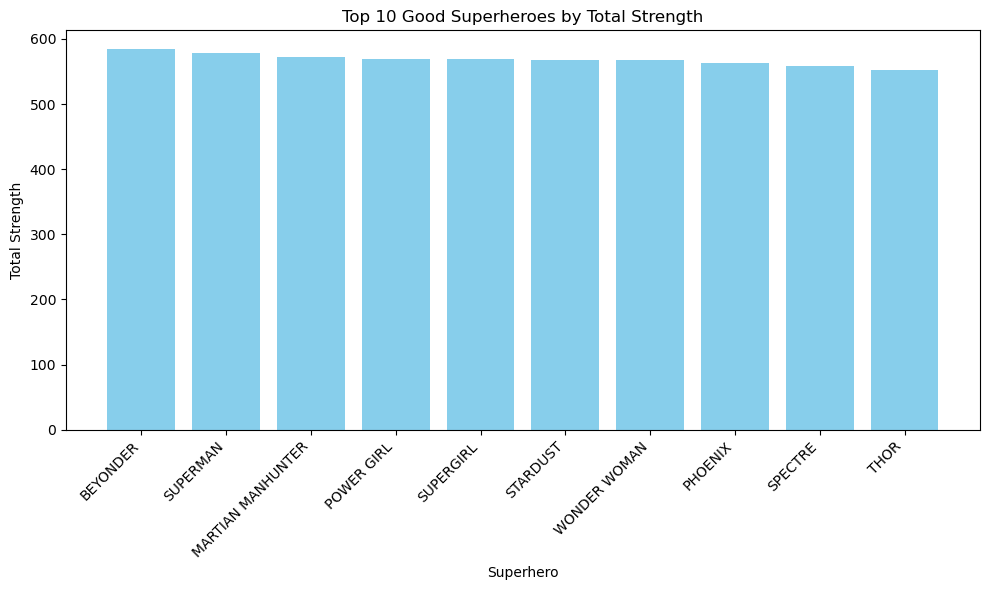

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(top_good_superheroes.head(10)['name'], top_good_superheroes.head(10)['total_strength'], color='skyblue')
plt.xlabel('Superhero')
plt.ylabel('Total Strength')
plt.title('Top 10 Good Superheroes by Total Strength')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
top_bad_superheroes = superhero_df[superhero_df['alignment'] == 'BAD']
top_bad_superheroes = top_bad_superheroes.sort_values(by='total_strength', ascending=False) 
top_bad_superheroes.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
277,278,GENERAL ZOD,94,100,96,100,100,95,DRU-ZOD,NO ALTER EGOS FOUND.,...,NO DATA,BLACK,BLACK,NO DATA,FORMERLY KRYPTON; FORMERLY THE PHANTOM ZONE; C...,PHANTOM ZONE CRIMINALS,URSA (MATE/WIFE); LOR-ZOD (SON); ADMIRAL ZOD (...,https://www.superherodb.com/pictures2/portrait...,NO DATA,585


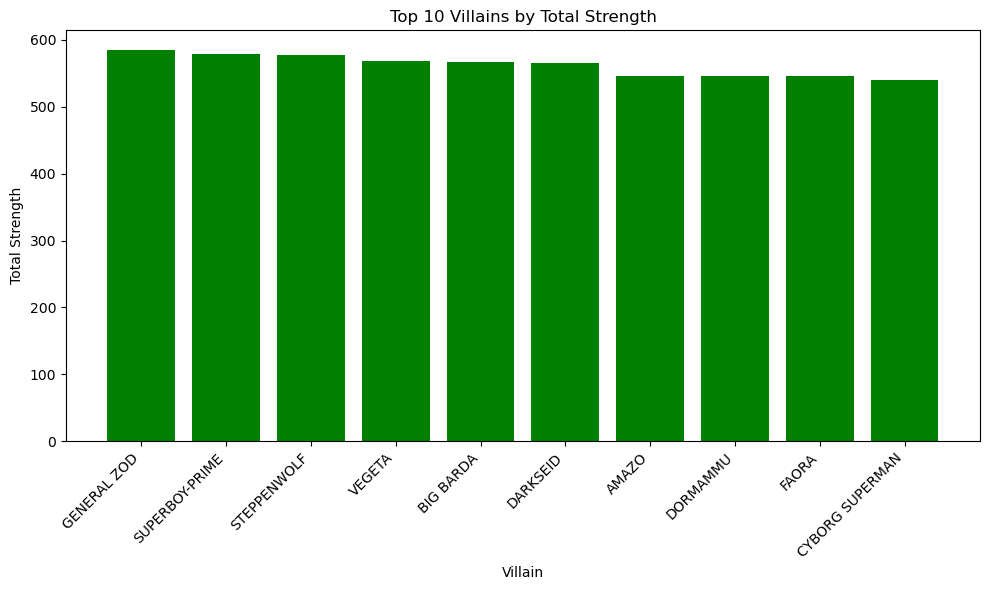

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(top_bad_superheroes.head(10)['name'], top_bad_superheroes.head(10)['total_strength'], color='green')
plt.xlabel('Villain')
plt.ylabel('Total Strength')
plt.title('Top 10 Villains by Total Strength')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
top_neutral_superheroes = superhero_df[superhero_df['alignment'] == 'NEUTRAL']
top_neutral_superheroes = top_neutral_superheroes.sort_values(by='total_strength', ascending=False) 
top_neutral_superheroes

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
502,503,ONE-ABOVE-ALL,100,100,100,100,100,100,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,LIVING TRIBUNAL (CREATION),https://www.superherodb.com/pictures2/portrait...,NO DATA,600
412,413,LOBO,94,100,54,100,100,85,LOBO,NO ALTER EGOS FOUND.,...,640 LB,RED,BLACK,PRIEST,MOBILE THROUGHOUT SEVERAL GALAXIES,LEGION,SLOBO (CLONE),https://www.superherodb.com/pictures2/portrait...,NO DATA,533
272,273,GALACTUS,100,100,83,100,100,50,GALAN,NO ALTER EGOS FOUND.,...,36400 LB,BLACK,BLACK,THIRD FACE OF THE LIVING TRIBUNAL - REPRESENTI...,WORLDSHIP (AKA TAA II); THOUGH HE IS GENERALLY...,HERALDS OF GALACTUS,"GALAN (""FATHER""), GALACTA (DAUGHTER)",https://www.superherodb.com/pictures2/portrait...,1966,533
409,410,LIVING TRIBUNAL,100,100,100,100,100,30,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,BLUE,NO HAIR,NO DATA,NO DATA,NO DATA,ONE-ABOVE-ALL (CREATOR),https://www.superherodb.com/pictures2/portrait...,NO DATA,530
92,93,BIZARRO,38,95,100,100,100,85,BIZARRO,NO ALTER EGOS FOUND.,...,345 LB,BLACK,BLACK,NO DATA,BIZARRO WORLD,SUPERMAN REVENGE SQUAD,"BIZARRO-LOIS NO. 1 (WIFE, PRE-CRISIS ONLY), BI...",https://www.superherodb.com/pictures2/portrait...,1958,518
582,583,SENTRY,75,100,100,84,100,40,ROBERT REYNOLDS,NO ALTER EGOS FOUND.,...,194 LB,BLUE,BLOND,NO DATA,"THE WATCHTOWER (ON TOP OF STARK TOWER, WHERE I...",HORSEMEN OF DEATH,"LINDY REYNOLDS (WIFE, DECEASED), MRS. REYNOLDS...",https://www.superherodb.com/pictures2/portrait...,2000,499
284,285,GLADIATOR,50,100,100,100,77,70,KALLARK,NO ALTER EGOS FOUND.,...,595 LB,BLUE,BLUE,MAJESTOR OF THE SHI'AR EMPIRE,"CHANDILAR, SHI'AR GALAXY; MOBILE THROUGHOUT TH...",GALACTIC COUNCIL,"KUBARK (KID GLADIATOR) (SON), XENITH (THE STRO...",https://www.superherodb.com/pictures2/portrait...,1977,497
212,213,DEADPOOL,69,32,50,100,100,100,WADE WILSON,"EVIL DEADPOOL, VENOMPOOL",...,210 LB,BROWN,NO HAIR,OTHERS,"CAVERN-X, SEDONA, ARIZONA, MOBILE",THUNDERBOLTS (STRIKE TEAM),"THOMAS ""MICKEY"" WILSON (FATHER, DECEASED); HAI...",https://www.superherodb.com/pictures2/portrait...,1991,451
373,374,JUGGERNAUT,44,100,42,100,85,70,CAIN MARKO,NO ALTER EGOS FOUND.,...,1900 LB,BLUE,RED,SOLDIER,NO DATA,WORTHY,"KURT MARKO (FATHER, DECEASED), MARJORIE MARKO ...",https://www.superherodb.com/pictures2/portrait...,1965,441
546,547,RED HULK,50,100,47,85,82,75,THADDEUS E. ROSS,NO ALTER EGOS FOUND.,...,1400 LB,YELLOW,BLACK,LIEUTENANT GENERAL IN US AIR FORCE,NO DATA,CODE RED,NO DATA,https://www.superherodb.com/pictures2/portrait...,1962,439


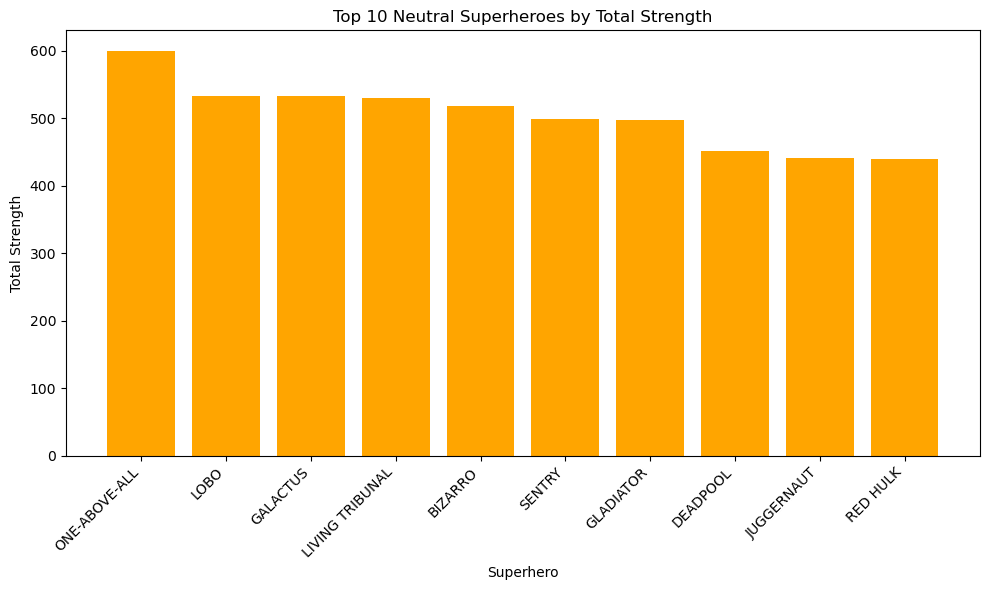

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(top_neutral_superheroes.head(10)['name'], top_neutral_superheroes.head(10)['total_strength'], color='orange')
plt.xlabel('Superhero')
plt.ylabel('Total Strength')
plt.title('Top 10 Neutral Superheroes by Total Strength')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
top_anti_hero_superheroes = superhero_df[superhero_df['alignment'] == 'ANTI-HERO']
top_anti_hero_superheroes = top_anti_hero_superheroes.sort_values(by='total_strength', ascending=False) 
top_anti_hero_superheroes

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
425,426,MAN OF MIRACLES,100,100,100,100,100,100,NO DATA,NO ALTER EGOS FOUND.,...,NO DATA,BLUE,SILVER,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,NO DATA,600
689,690,VENOMPOOL,69,57,63,100,100,100,WADE WILSON,"DEADPOOL, EVIL DEADPOOL",...,NO DATA,NO DATA,NO DATA,CONQUEROR,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,2011,489
33,34,ANTI-VENOM,75,60,65,90,96,84,EDDIE BROCK,"TOXIN, VENOM",...,795 LB,BLUE,BLOND,VIGILANTE,"NEW YORK, NEW YORK",NO DATA,"CARL BROCK (FATHER, ESTRANGED), JANINE BROCK (...",https://www.superherodb.com/pictures2/portrait...,NO DATA,470
532,533,Q,100,12,17,100,100,40,Q,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,NO DATA,369
110,111,BLACKWULF,50,28,8,30,69,25,LUCIAN,NO ALTER EGOS FOUND.,...,195 LB,RED,WHITE,FREEDOM FIGHTER,NO DATA,UNDERGROUND LEGION,TANTALUS (FATHER); NIRVANA (MOTHER); PELOPS (B...,https://www.superherodb.com/pictures2/portrait...,1994,210
138,139,BRUNDLEFLY,69,32,25,40,27,15,SETH BRUNDLE,NO ALTER EGOS FOUND.,...,NO DATA,NO DATA,NO DATA,SCIENTIST,NO DATA,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,1986,208
673,674,TRICKSTER,0,0,0,0,0,0,GIOVANNI GIUSEPPE,NO ALTER EGOS FOUND.,...,179 LB,BLUE,BLOND,CON ARTIST,KEYSTONE CITY,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,1960,0


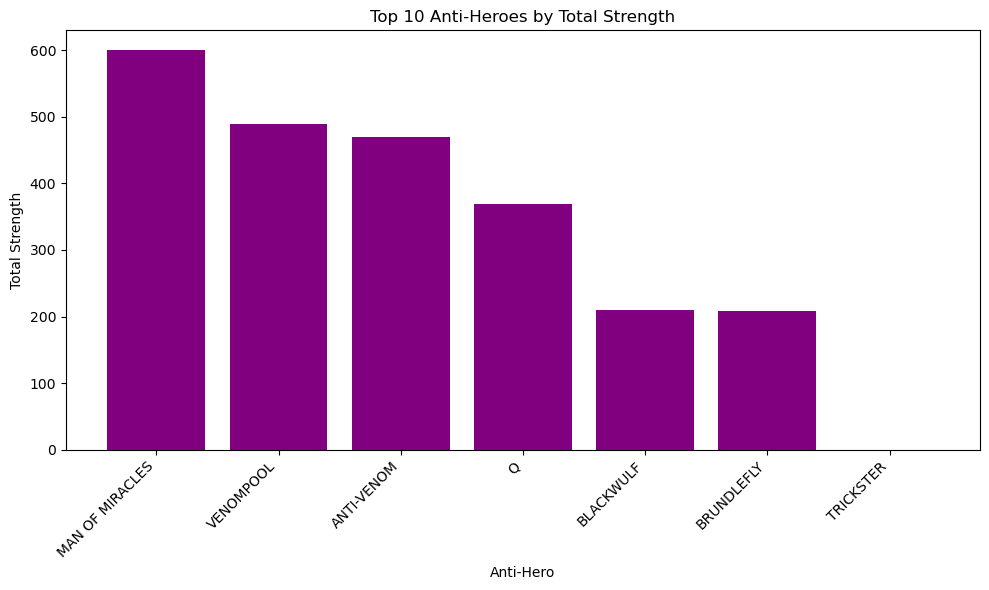

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(top_anti_hero_superheroes.head(10)['name'], top_anti_hero_superheroes.head(10)['total_strength'], color='purple')
plt.xlabel('Anti-Hero')
plt.ylabel('Total Strength')
plt.title('Top 10 Anti-Heroes by Total Strength')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Alignement by Total Strength Analysis 

In [60]:
alignment_data = superhero_df[['alignment', 'total_strength']]

In [61]:
colors = {
    'GOOD': 'lightblue',
    'BAD': 'green',
    'NEUTRAL': 'orange',
    'ANTI-HERO': 'purple' 
}

C:\Users\Jenna\AppData\Local\Temp\ipykernel_14320\3318726037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=alignment_data, x='alignment', y='total_strength', order=['GOOD', 'BAD', 'NEUTRAL', 'ANTI-HERO'], palette=colors)


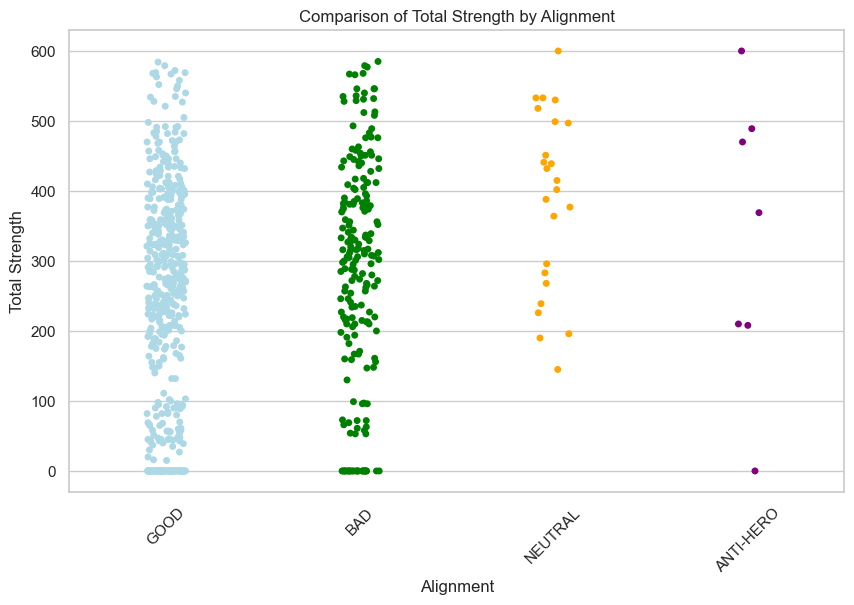

In [62]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(data=alignment_data, x='alignment', y='total_strength', order=['GOOD', 'BAD', 'NEUTRAL', 'ANTI-HERO'], palette=colors)
plt.title('Comparison of Total Strength by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Total Strength')
plt.xticks(rotation=45)
plt.show()

In [63]:
dc_df = superhero_df[superhero_df['publisher'] == 'DC COMICS']
marvel_df = superhero_df[superhero_df['publisher'] == 'MARVEL COMICS']
dc_good = dc_df[dc_df['alignment'] == 'GOOD'].nlargest(5, 'total_strength')
dc_bad = dc_df[dc_df['alignment'] == 'BAD'].nlargest(5, 'total_strength')
marvel_good = marvel_df[marvel_df['alignment'] == 'GOOD'].nlargest(5, 'total_strength')
marvel_bad = marvel_df[marvel_df['alignment'] == 'BAD'].nlargest(5, 'total_strength')
top_heroes = pd.concat([dc_good, dc_bad, marvel_good, marvel_bad])
top_heroes.head(1)

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
431,432,MARTIAN MANHUNTER,100,95,92,100,100,85,J'ONN J'ONZZ,NO ALTER EGOS FOUND.,...,300 LB,RED,NO HAIR,NO DATA,NO DATA,DARKSTARS,"M'YRNN J'ONZZ (FATHER, DECEASED); SHA'SHEEN J'...",https://www.superherodb.com/pictures2/portrait...,1955,572


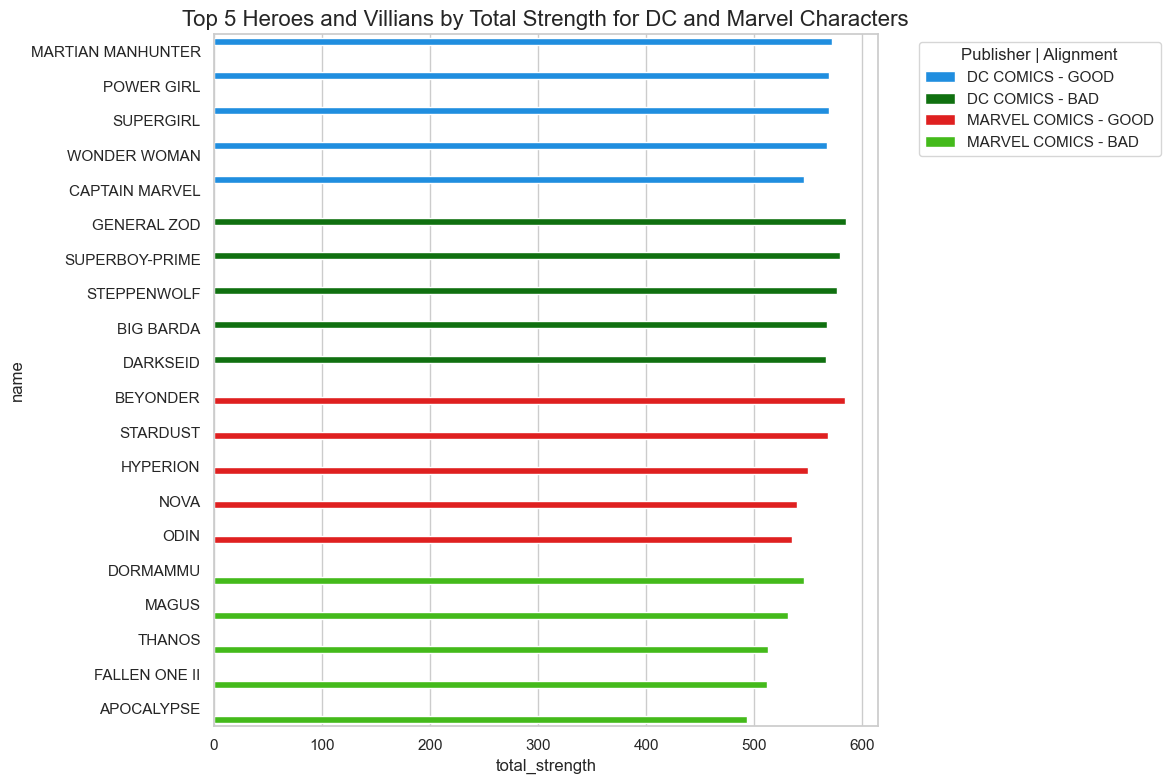

In [64]:
sns.set(style="whitegrid")
top_heroes['category'] = top_heroes['publisher'] + ' - ' + top_heroes['alignment']

custom_palette = ['#0093ff', 'green', '#ff0000', '#37d500']

plt.figure(figsize=(12, 8))
sns.barplot(x='total_strength', y='name', hue='category', data=top_heroes, dodge=True, palette=custom_palette)
plt.title('Top 5 Heroes and Villians by Total Strength for DC and Marvel Characters', fontsize=16)
plt.legend(title="Publisher | Alignment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Hair Color Distribution All Heroes

In [67]:
no_data_hair_df = superhero_df[superhero_df['hair_color'] != 'NO DATA']
hair_color_counts = no_data_hair_df['hair_color'].value_counts()
top_10_hair_colors = hair_color_counts.head(10)
top_10_hair_colors

hair_color
BLACK               161
BLOND               101
BROWN                85
NO HAIR              75
RED                  51
WHITE                23
AUBURN               13
GREEN                 8
STRAWBERRY BLOND      7
PURPLE                5
Name: count, dtype: int64

In [68]:
bar_colors = ['black', '#fedc02', '#6d3b09', '#f9f3e3', '#a00a0a', '#cfcfcf', '#c65603', '#00a917', '#ffa200', '#8a04ab']

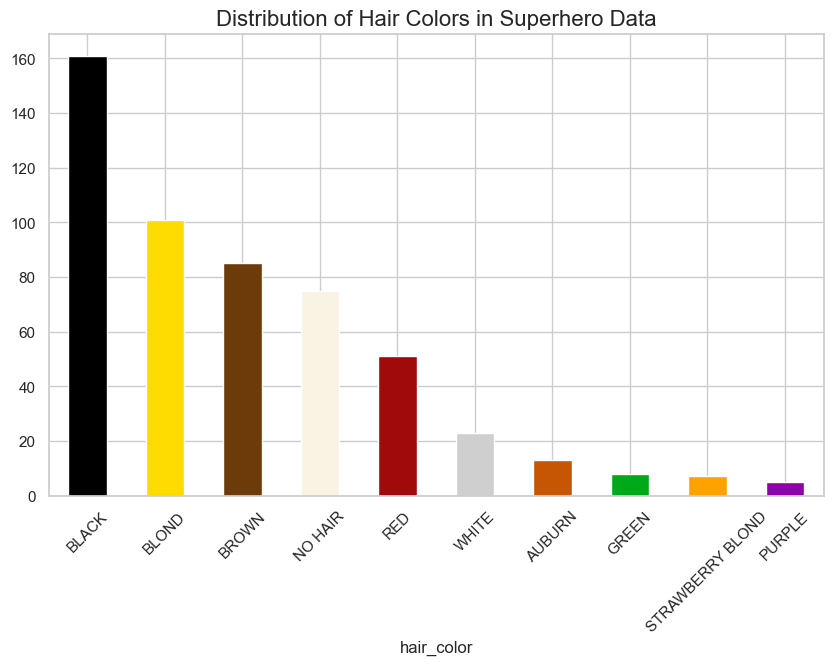

In [69]:
plt.figure(figsize=(10, 6))
top_10_hair_colors.plot(kind='bar', color=bar_colors, edgecolor='white')
plt.title('Distribution of Hair Colors in Superhero Data', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [70]:
women_df = superhero_df[superhero_df['gender'] == 'FEMALE']
women_df_cleaned = women_df[women_df['hair_color'] != 'NO DATA']
hair_color_count = women_df.groupby('hair_color').size()
top_3_hair_colors = hair_color_count.nlargest(3)
top_3_hair_colors

hair_color
BLACK      45
BLOND      43
NO DATA    38
dtype: int64

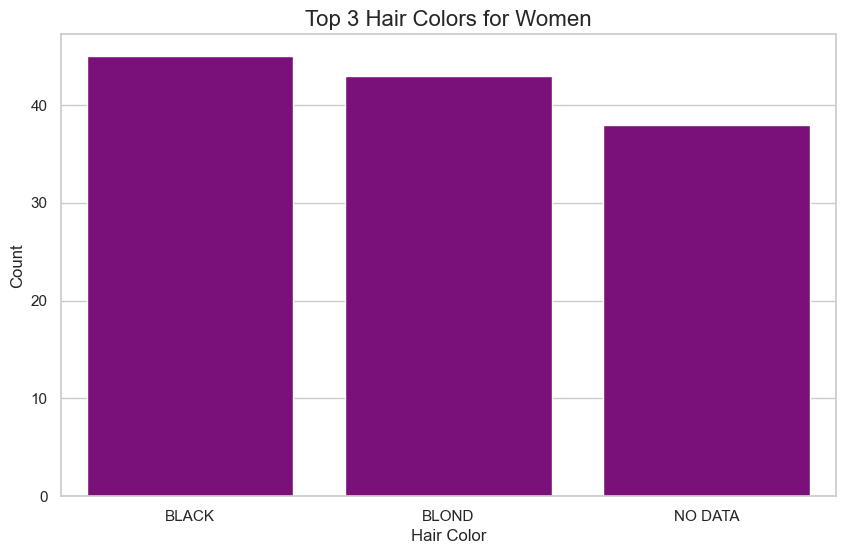

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_hair_colors.index, y=top_3_hair_colors.values, color='darkmagenta')
plt.title('Top 3 Hair Colors for Women', fontsize=16)
plt.xlabel('Hair Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('woman_hair.png',bbox_inches = 'tight', transparent=True)
plt.show()


## Eye Color Distribution All Heroes

In [73]:
no_data_eye_df = superhero_df[superhero_df['eye_color'] != 'NO DATA']
eye_color_counts = no_data_eye_df['eye_color'].value_counts()
top_10_eye_colors = eye_color_counts.head(10)
top_10_eye_colors

eye_color
BLUE      225
BROWN     125
GREEN      72
RED        46
BLACK      23
YELLOW     19
WHITE      17
GREY        6
HAZEL       6
PURPLE      4
Name: count, dtype: int64

In [74]:
eye_colors = ['#60e4fe', '#7c4200', '#9cfa75', '#fa9475', '#000000', '#faf075', '#fcf3de', '#9b9994', '#8E7618', '#c875fa']

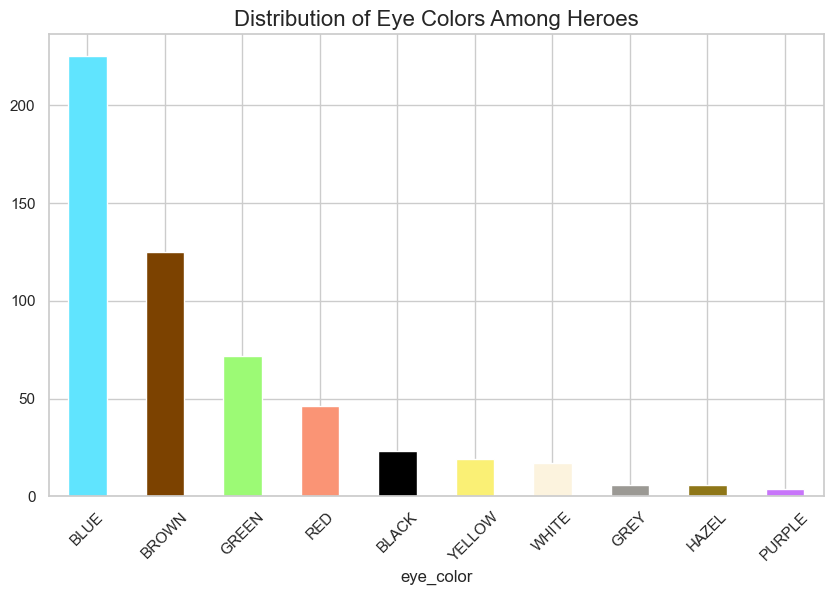

In [75]:
plt.figure(figsize=(10, 6))
top_10_eye_colors.plot(kind='bar', color=eye_colors, edgecolor='white')
plt.title('Distribution of Eye Colors Among Heroes', fontsize=16)
plt.xticks(rotation=45)
plt.show()

### Race Distribution All Heroes

In [77]:
no_data_race_df = superhero_df[superhero_df['race'] != 'NO DATA']
race_counts = no_data_race_df['race'].value_counts()
top_10_race = race_counts.head(10)
top_10_race

race
HUMAN                206
MUTANT                63
GOD / ETERNAL         14
HUMAN / RADIATION     11
CYBORG                11
ANDROID                9
SYMBIOTE               9
KRYPTONIAN             7
ALIEN                  7
DEMON                  6
Name: count, dtype: int64

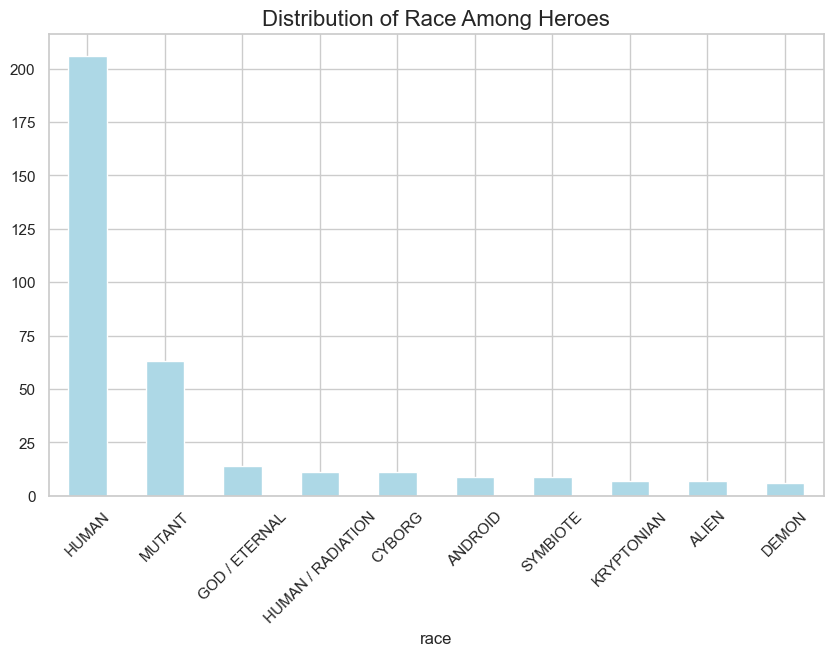

In [78]:
plt.figure(figsize=(10, 6))
top_10_race.plot(kind='bar', color='lightblue', edgecolor='white')
plt.title('Distribution of Race Among Heroes', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('race_hman.png',bbox_inches = 'tight', transparent=True)
plt.show()

## Gender Distribution All Heroes

In [80]:
gender_counts = superhero_df['gender'].value_counts()
gender_counts

gender
MALE       523
FEMALE     203
AGENDER      5
Name: count, dtype: int64

In [81]:
gen_colors = ['lightblue', 'darkmagenta', 'orange']

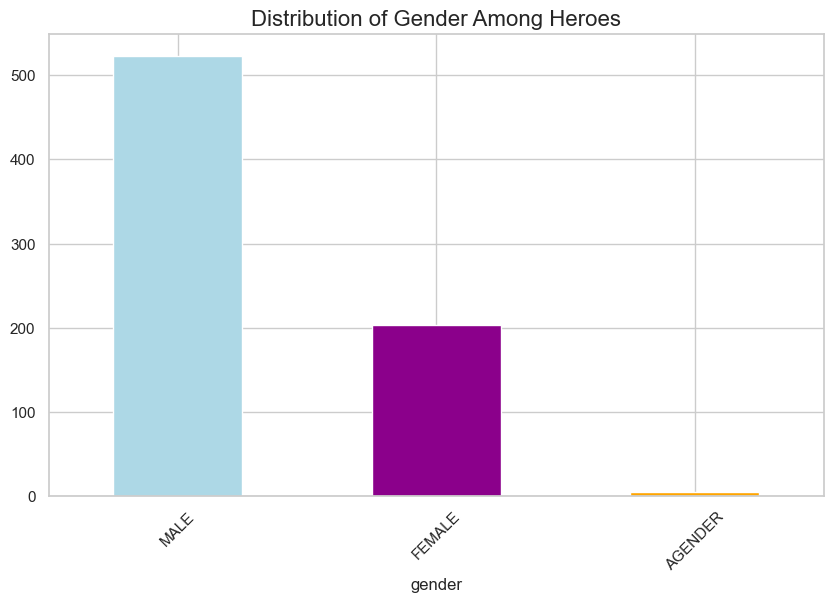

In [82]:
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=gen_colors, edgecolor='white')
plt.title('Distribution of Gender Among Heroes', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('gender_side.png', transparent=True)
plt.show()

In [83]:
male_heroes = superhero_df[superhero_df['gender'] == 'MALE']
male_heroes

,id,name,intelligence,strength,speed,durability,power,combat,full_name,alter_egos,...,weight,eye_color,hair_color,occupation,city_base,group_affiliation,relatives,image_url,year_created,total_strength
0,1,A-BOMB,38,100,17,80,24,64,RICHARD MILHOUSE JONES,NO ALTER EGOS FOUND.,...,980 LB,YELLOW,NO HAIR,AUTHOR,NO DATA,HULK FAMILY,MARLO CHANDLER-JONES (WIFE); POLLY (AUNT); MRS...,https://www.superherodb.com/pictures2/portrait...,2008,323
1,2,ABE SAPIEN,88,28,35,65,100,85,ABRAHAM SAPIEN,NO ALTER EGOS FOUND.,...,145 LB,BLUE,NO HAIR,PARANORMAL INVESTIGATOR,NO DATA,BUREAU FOR PARANORMAL RESEARCH AND DEFENSE,"EDITH HOWARD (WIFE, DECEASED)",https://www.superherodb.com/pictures2/portrait...,1993,401
2,3,ABIN SUR,50,90,53,64,99,65,NO DATA,NO ALTER EGOS FOUND.,...,200 LB,BLUE,NO HAIR,HISTORY PROFESSOR,OA,GREEN LANTERN CORPS,"AMON SUR (SON), ARIN SUR (SISTER), THAAL SINES...",https://www.superherodb.com/pictures2/portrait...,1959,421
3,4,ABOMINATION,63,80,53,90,62,95,EMIL BLONSKY,NO ALTER EGOS FOUND.,...,980 LB,GREEN,NO HAIR,EX-SPY,MOBILE,THE CREW OF THE ANDROMEDA STARSHIP,"NADIA DORNOVA BLONSKY (WIFE, SEPARATED)",https://www.superherodb.com/pictures2/portrait...,NO DATA,443
4,5,ABRAXAS,88,63,83,100,100,55,ABRAXAS,NO ALTER EGOS FOUND.,...,NO DATA,BLUE,BLACK,DIMENSIONAL DESTROYER,NO DATA,COSMIC BEINGS,"ETERNITY (""FATHER"")",https://www.superherodb.com/pictures2/portrait...,2001,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,YELLOW CLAW,0,0,0,0,0,0,NO DATA,NO ALTER EGOS FOUND.,...,210 LB,BLUE,NO HAIR,WOULD-BE CONQUEROR,VARIOUS HIDDEN BASES THROUGHOUT THE WORLD,NO DATA,NO DATA,https://www.superherodb.com/pictures2/portrait...,NO DATA,0
725,726,YELLOWJACKET,88,10,12,28,12,14,HANK PYM,"ANT-MAN, GIANT-MAN, GOLIATH, WASP II",...,185 LB,BLUE,BLOND,MANAGER OF AVENGERS COMPOUND,"AVENGERS MANSION, NEW YORK CITY, NEW YORK, (FO...",THE AVENGERS,"MARIA TROVAYA (FIRST WIFE, DECEASED), JANET VA...",https://www.superherodb.com/pictures2/portrait...,NO DATA,164
727,728,YMIR,50,100,27,100,98,28,YMIR,NO ALTER EGOS FOUND.,...,NO DATA,WHITE,NO HAIR,NO DATA,NIFFLEHEIM,NO DATA,"UTGARD-LOKI, LOKI, AND THE RACE OF FROST GIANT...",https://www.superherodb.com/pictures2/portrait...,NO DATA,403
728,729,YODA,88,52,33,25,100,90,YODA,NO ALTER EGOS FOUND.,...,38 LB,BROWN,WHITE,NO DATA,NO DATA,JEDI ORDER,"MASTER: N'KATA DEL GORMO, APPRENTICES: DOOKU, ...",https://www.superherodb.com/pictures2/portrait...,1980,388


## Powerstat Averages

In [84]:
average_intelligence_male = male_heroes['intelligence'].mean()
average_intelligence_male

50.66539196940727

In [85]:
average_strength_male = male_heroes['strength'].mean()
average_strength_male

39.669216061185466

In [86]:
average_speed_male = male_heroes['speed'].mean()
average_speed_male

31.965583173996176

In [87]:
average_durability_male = male_heroes['durability'].mean()
average_durability_male

48.41682600382409

In [88]:
average_power_male = male_heroes['power'].mean()
average_power_male

50.766730401529635

In [89]:
average_combat_male = male_heroes['combat'].mean()
average_combat_male

48.24474187380497

In [90]:
female_heroes = superhero_df[superhero_df['gender'] == 'FEMALE']

In [91]:
average_intelligence_female = female_heroes['intelligence'].mean()
average_intelligence_female

47.26108374384236

In [92]:
average_strength_female = female_heroes['strength'].mean()
average_strength_female

32.26108374384236

In [93]:
average_speed_female = female_heroes['speed'].mean()
average_speed_female

28.133004926108374

In [94]:
average_durability_female = female_heroes['durability'].mean()
average_durability_female

37.689655172413794

In [95]:
average_power_female = female_heroes['power'].mean()
average_power_female

46.4384236453202

In [96]:
average_combat_female = female_heroes['combat'].mean()
average_combat_female

46.05418719211823

In [97]:
avg_data = {
    'Attribute': [
        'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat'
    ],
    'MALE': [
        average_intelligence_male, average_strength_male, average_speed_male, 
        average_durability_male, average_power_male, average_combat_male
    ],
    'FEMALE': [
        average_intelligence_female, average_strength_female, average_speed_female, 
        average_durability_female, average_power_female, average_combat_female
    ]
}

In [98]:
avg_df = pd.DataFrame(avg_data)
avg_df

,Attribute,MALE,FEMALE
0,Intelligence,50.665392,47.261084
1,Strength,39.669216,32.261084
2,Speed,31.965583,28.133005
3,Durability,48.416826,37.689655
4,Power,50.766730,46.438424
5,Combat,48.244742,46.054187


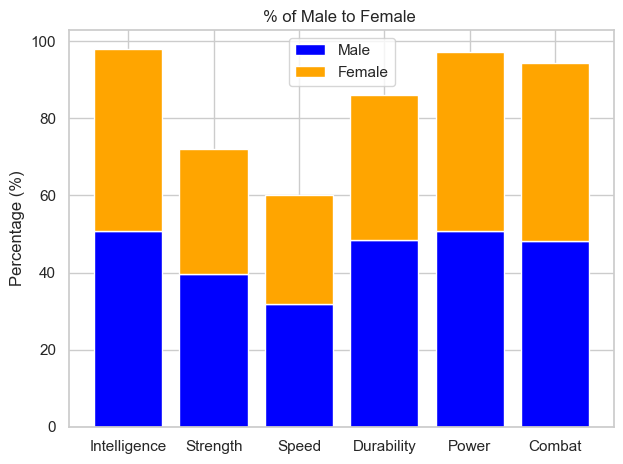

In [99]:
plt.bar(avg_df['Attribute'], avg_df['MALE'], label='Male', color='blue')
plt.bar(avg_df['Attribute'], avg_df['FEMALE'], bottom=avg_df['MALE'], label='Female', color='orange')
plt.ylabel('Percentage (%)')
plt.title('% of Male to Female ')
plt.legend()
plt.tight_layout()
plt.show()

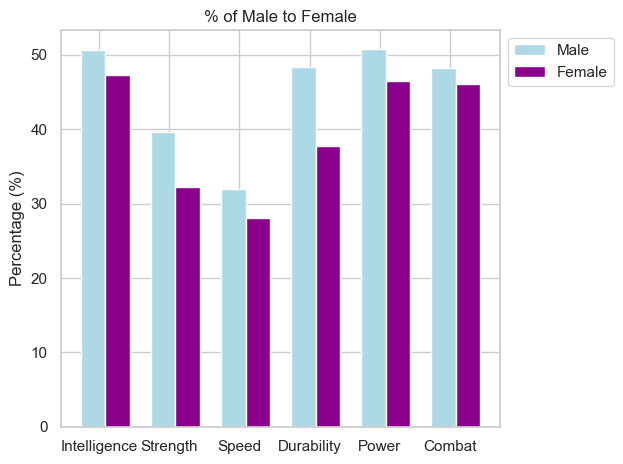

In [100]:
bar_width = 0.35
index = np.arange(len(avg_df['Attribute']))
plt.bar(index, avg_df['MALE'], bar_width, label='Male', color='lightblue')
plt.bar(index + bar_width, avg_df['FEMALE'], bar_width, label='Female', color='darkmagenta')

plt.ylabel('Percentage (%)')
plt.title('% of Male to Female')
plt.xticks(index + bar_width / 4, avg_df['Attribute'])
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('side_by_side_chart.png', transparent=True)
plt.show()

## Alignment by Gender Analysis

In [101]:
good_heroes = superhero_df[superhero_df['alignment'] == 'GOOD']
gender_counts = good_heroes['gender'].value_counts()
total_good_heroes = len(good_heroes)
percentage_gender = (gender_counts / total_good_heroes) * 100
percentage_gender

gender
MALE      66.801619
FEMALE    33.198381
Name: count, dtype: float64

In [102]:
color_for_chart = {
    'MALE': 'lightblue',
    'FEMALE': 'darkmagenta'
}

In [103]:
colors = [color_for_chart[gender] for gender in gender_counts.index]


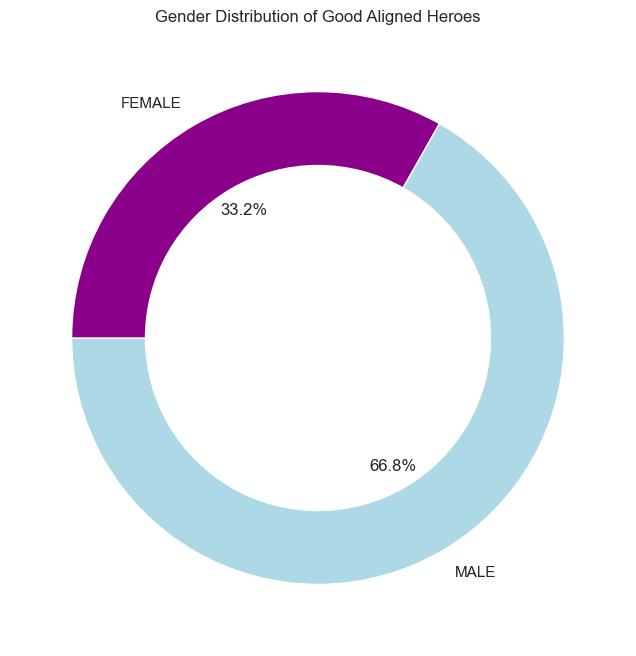

In [104]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts .index, autopct='%1.1f%%', startangle=180, 
        wedgeprops={'width': 0.3}, colors=colors)
plt.title('Gender Distribution of Good Aligned Heroes')
plt.savefig('good_aligned.png', transparent=True)
plt.show()

In [105]:
bad_heroes = superhero_df[superhero_df['alignment'] == 'BAD']
gender_counts_bad = bad_heroes['gender'].value_counts()
total_bad_heroes = len(bad_heroes)
percentage_gender_bad = (gender_counts_bad / total_bad_heroes) * 100
percentage_gender_bad

gender
MALE       82.038835
FEMALE     16.990291
AGENDER     0.970874
Name: count, dtype: float64

In [106]:
color_for_chart2 = {
    'MALE': 'lightblue',
    'FEMALE': 'darkmagenta',
    'AGENDER': 'grey'
}

In [107]:
colors_2 = [color_for_chart2[gender] for gender in gender_counts_bad.index]

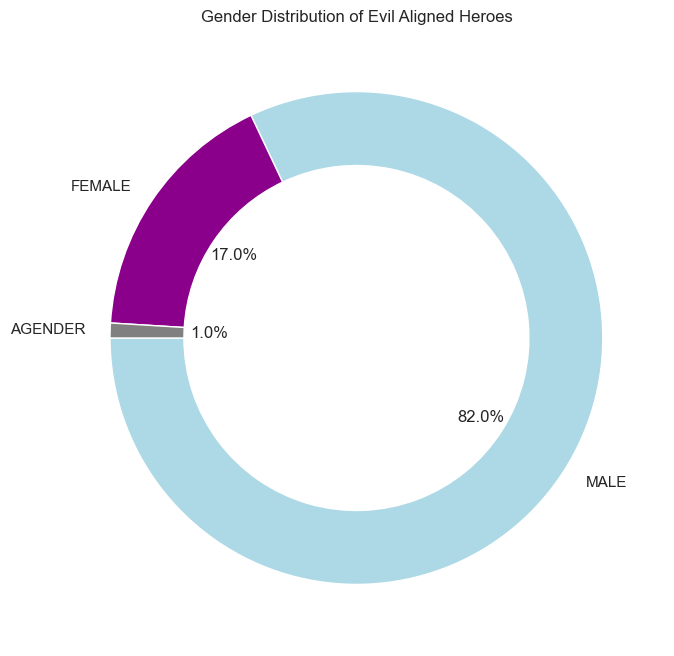

In [108]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_bad, labels=gender_counts_bad.index, autopct='%1.1f%%', startangle=180, 
        wedgeprops={'width': 0.3}, colors=colors_2)
plt.title('Gender Distribution of Evil Aligned Heroes')
plt.savefig('evil_aligned.png', transparent=True)
plt.show()

In [109]:
human_heroes = superhero_df[superhero_df['race'] == 'HUMAN']
gender_counts_race = human_heroes['gender'].value_counts()
total_human_heroes = len(human_heroes)
percentage_gender = (gender_counts_race / total_human_heroes) * 100
percentage_gender 

gender
MALE      75.728155
FEMALE    24.271845
Name: count, dtype: float64

In [110]:
color_for_chart3 = {
    'MALE': 'lightblue',
    'FEMALE': 'darkmagenta'
}

In [111]:
colors_3 = [color_for_chart3[gender] for gender in gender_counts_race.index]

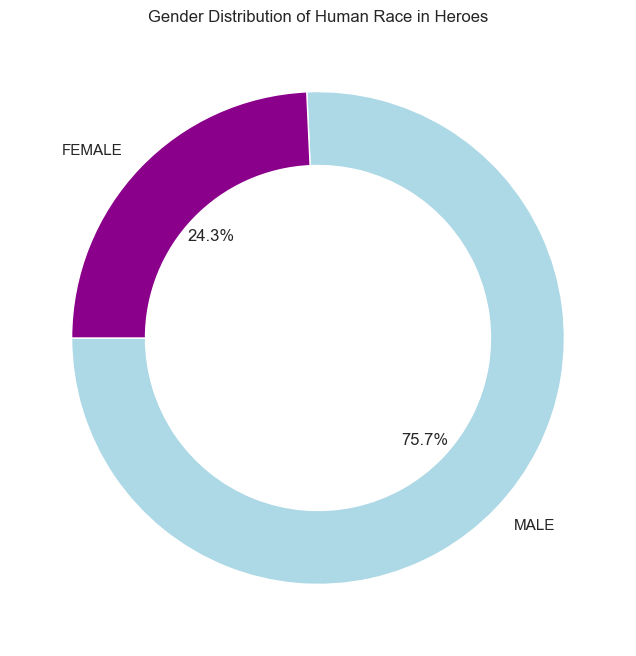

In [112]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_race, labels=gender_counts_race.index, autopct='%1.1f%%', startangle=180, 
        wedgeprops={'width': 0.3}, colors=colors_2)
plt.title('Gender Distribution of Human Race in Heroes')
plt.savefig('human_race.png', transparent=True)
plt.show()

## Gender Distribution DC V Marvel

In [114]:
dc_heroes_df = superhero_df[superhero_df['publisher'] == 'DC COMICS']
gender_counts = dc_heroes_df['gender'].value_counts()
gender_counts = gender_counts[gender_counts.index.isin(['MALE', 'FEMALE'])]

In [115]:
colors = ['lightblue', 'darkmagenta']

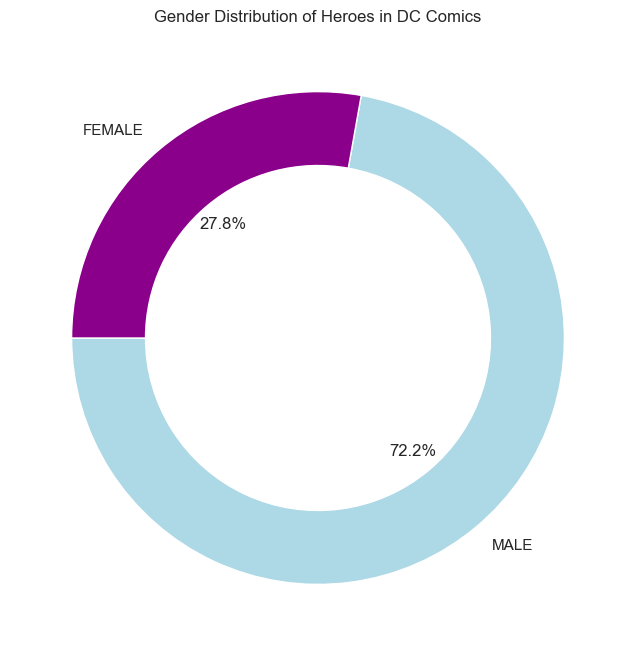

In [116]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, wedgeprops=dict(width=0.3), colors=colors)
plt.title("Gender Distribution of Heroes in DC Comics")
plt.savefig('dc_comics.png', transparent=True)

plt.show()

In [117]:
marvel_heroes_df = superhero_df[superhero_df['publisher'] == 'MARVEL COMICS']
gender_counts2 = marvel_heroes_df['gender'].value_counts()
gender_counts2 = gender_counts2[gender_counts2.index.isin(['MALE', 'FEMALE'])]

In [118]:
colors2 = ['lightblue', 'darkmagenta']

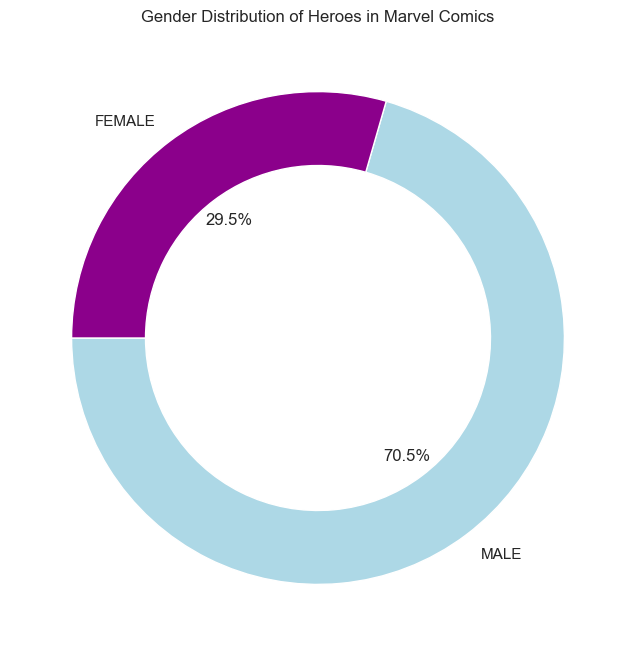

In [119]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts2, labels=gender_counts2.index, autopct='%1.1f%%', startangle=180, wedgeprops=dict(width=0.3), colors=colors2)
plt.title("Gender Distribution of Heroes in Marvel Comics")
plt.savefig('marvel_comics.png', transparent=True)

plt.show()


## Occupations by Gender 

In [120]:
female_heroes = superhero_df[superhero_df['gender'] == 'FEMALE']
female_occupations = female_heroes['occupation'].value_counts()
female_occupations

occupation
NO DATA                 82
ADVENTURER              15
STUDENT                  6
TERRORIST                4
MODEL                    4
                        ..
GODDESS OF MARRIAGE      1
SERIAL KILLER            1
ARTIST                   1
AGENT OF THE COMPANY     1
ELECTRONICS ENGINEER     1
Name: count, Length: 86, dtype: int64

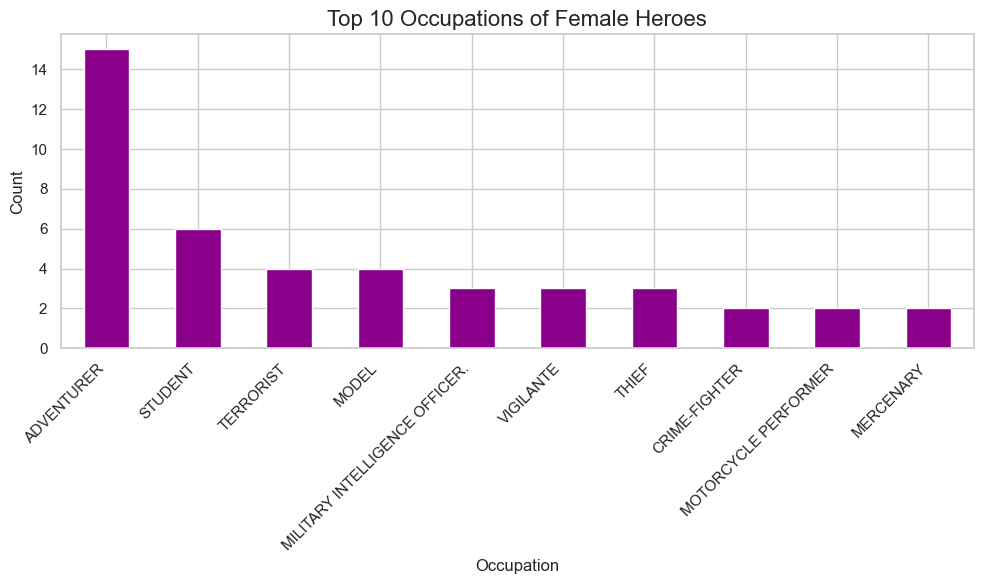

In [121]:
female_occupations_remove = female_occupations.iloc[1:].head(10)
female_occupations_remove.head(11).plot(kind='bar', figsize=(10, 6), color='darkmagenta')
plt.title('Top 10 Occupations of Female Heroes', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_ten_female.png', transparent=True)

plt.show()

In [122]:
male_heroes = superhero_df[superhero_df['gender'] == 'MALE']
male_occupations = male_heroes['occupation'].value_counts()
male_occupations.head(11)

occupation
NO DATA                  208
ADVENTURER                22
STUDENT                   16
PROFESSIONAL CRIMINAL     11
SCIENTIST                  9
SOLDIER                    8
VIGILANTE                  5
MERCENARY                  4
WARRIOR                    4
FREEDOM FIGHTER            4
SUPERHERO                  3
Name: count, dtype: int64

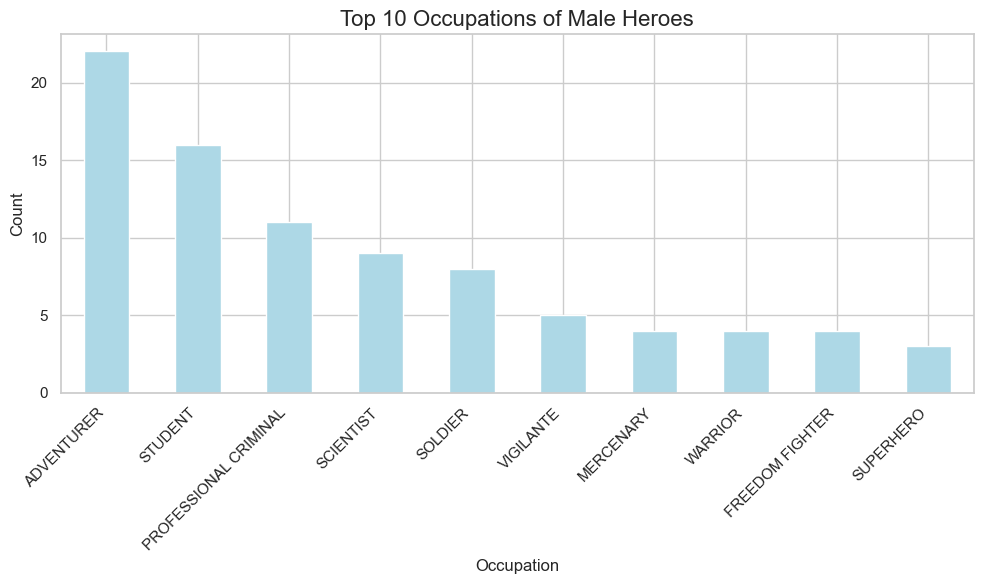

In [123]:
male_occupations_remove = male_occupations.iloc[1:].head(10)
male_occupations_remove.head(10).plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Top 10 Occupations of Male Heroes', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_ten_male.png', transparent=True)
plt.show()

In [124]:
superhero_df = superhero_df[superhero_df['occupation'] != 'NO DATA']

In [125]:
male_df = superhero_df[superhero_df['gender'] == 'MALE']
female_df = superhero_df[superhero_df['gender'] == 'FEMALE']

In [126]:
male_job_counts = male_df['occupation'].value_counts().head(20)
female_job_counts = female_df['occupation'].value_counts().head(20)

In [127]:
job_comparison_df = pd.DataFrame({
    'Male Jobs': male_job_counts,
    'Female Jobs': female_job_counts
})

In [128]:
job_comparison_df.head(5)

,Male Jobs,Female Jobs
occupation,,
ADVENTURER,22.0,15.0
AGENT OF SHIELD,NaN,1.0
AIR FORCE TEST PILOT,2.0,NaN
ARTIST,2.0,NaN
BOTANIST,NaN,1.0


In [129]:
job_comparison_df = job_comparison_df.fillna(0)
job_comparison_df = job_comparison_df.astype(int)
job_comparison_df

,Male Jobs,Female Jobs
occupation,,
ADVENTURER,22,15
AGENT OF SHIELD,0,1
AIR FORCE TEST PILOT,2,0
ARTIST,2,0
BOTANIST,0,1
BOUNTY HUNTER,2,0
BUSINESSMAN,2,0
CAB DRIVER,2,0
COMPUTER HACKER AND COORDINATOR OF THE BIRDS OF PREY,0,1


## Gender by Teams

In [130]:
team_members = superhero_df[superhero_df['group_affiliation'].notnull()]
gender_count = team_members.groupby('gender').size()
total_team_members = gender_count.sum()
gender_percentage = (gender_count / total_team_members) * 100
gender_percentage

gender
AGENDER     0.228833
FEMALE     27.688787
MALE       72.082380
dtype: float64

In [131]:
colors4 = ['grey', 'darkmagenta', 'lightblue']

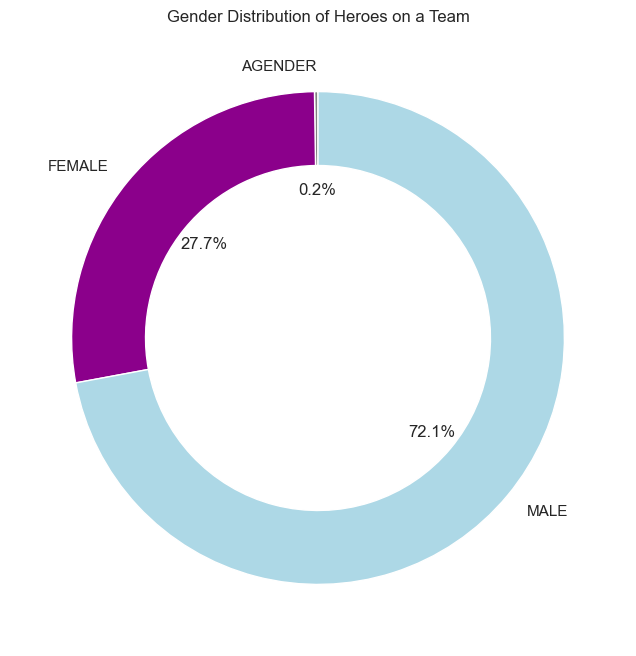

In [132]:
plt.figure(figsize=(8, 8))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=colors4)
plt.title("Gender Distribution of Heroes on a Team")
plt.savefig('teams.png', transparent=True)
plt.show()